# Agora Forum

In [2]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def forumStatSoupToRow(soup, date):
    num_members = None
    num_posts = None
    num_topics = None
    num_online = None
    
    temp = soup.find_all("dl",class_="stats")[0]
    num_members = temp.find_all('a')[0].text
    
    if len(temp.find_all('dd'))>1:
        num_posts = temp.find_all('dd')[1].text
        
    if len(temp.find_all('dd'))>2:
        num_topics = temp.find_all('dd')[2].text
        
    if len(temp.find_all('dd'))>3:
        num_online = temp.find_all('dd')[3].text
   
    
    new_row={'members':int(num_members), 'posts':int(num_posts),
             'topics':int(num_topics),
             'nOnline':int(num_online), 'date' :date}
    return new_row

def createDfFromStat(directory, dates):
    filename = "/index.php?action=stats"
    forumDF = pd.DataFrame(columns=['members', 'posts','topics', 'nOnline', 'date'])
    for date in dates:
        try:
            with open(directory+str(date)+filename) as fp:
                soup = bs(fp, features="html.parser")
                topicList = soup.find_all('body')[0].find_all('div', class_="windowbg2")
                for s in topicList:
                    new_row = forumStatSoupToRow(s, date)
                    forumDF = forumDF.append(new_row, ignore_index=True)
                    break
        except:
            print("Notfound")
        
    return forumDF

In [3]:
directory = "data/agora-forums/"
with open('data/agora_forum_days.out') as f:
    dates = f.readlines()

def cut(s):
    return s[:-1]
cut_v = np.vectorize(cut)

dates = cut_v(dates)



In [25]:
forumDF = createDfFromStat(directory, dates)

Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound


In [135]:
forumDF.sort_values(by=('date'))[40:50]

,members,posts,topics,nOnline,date,new_posts,new_members,new_topics,days_elapsed
40,22763,368152,22135,5,2014-09-14,13164.000000,65.000000,109.00000,6.0
41,23145,479990,22293,5,2014-09-22,13979.750000,47.750000,19.75000,8.0
42,23503,535938,22724,5,2014-09-26,13987.000000,89.500000,107.75000,4.0
43,23664,334265,22495,5,2014-09-28,-100836.500000,80.500000,-114.50000,2.0
44,28464,528328,26640,5,2014-11-18,3805.156863,94.117647,81.27451,51.0
45,28729,570108,26801,5,2014-11-19,41780.000000,265.000000,161.00000,1.0
46,29143,523840,27080,5,2014-11-21,-23134.000000,207.000000,139.50000,2.0
47,29363,547801,27242,5,2014-11-29,2995.125000,27.500000,20.25000,8.0
48,30927,1311793,28683,5,2014-12-15,47749.500000,97.750000,90.06250,16.0
49,31664,2054851,28856,5,2014-12-20,148611.600000,147.400000,34.60000,5.0


PENDANT TOUTE UNE PERIODE, PAS DE STAT PARCE QUE PAS LOGGED IN, INFÉRER EN UTLISANT LES AUTRES DONNÉES 


In [77]:
new_posts = pd.Series(np.zeros(len(forumDF['date'])))
forumDF['date'] = forumDF['date'].apply(pd.to_datetime)

(forumDF['date'][1] - forumDF['date'][1]).days

0

In [116]:
days_elapsed = pd.Series(np.zeros(len(forumDF['date'])))
old_val = 0
old_date = forumDF['date'][0]
for i in range(len(new_posts)):
    diff = (forumDF['date'][i] - old_date).days
    if(diff) == 0:
        diff = 1
    new_posts[i] = (forumDF['posts'][i] - old_val)/diff
    days_elapsed[i] = diff
    old_val = forumDF['posts'][i]
    old_date = forumDF['date'][i]
    
forumDF['new_posts'] = new_posts
forumDF['days_elapsed'] = days_elapsed

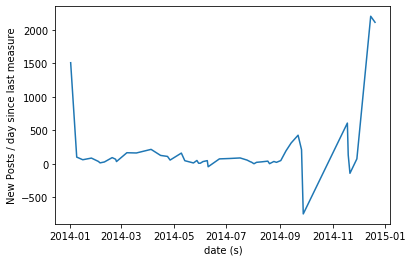

In [106]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('date (s)')
ax1.set_ylabel('New Posts / day since last measure')
ax1.plot(forumDF['date'][:50], forumDF['new_posts'][:48])
ax1.tick_params(axis='y')

plt.show()

In [90]:
old_val = 0
old_date = forumDF['date'][0]

for i in range(len(new_posts)):
    diff = (forumDF['date'][i] - old_date).days
    if(diff) == 0:
        diff = 1
    new_posts[i] = (forumDF['members'][i] - old_val)/diff
    old_val = forumDF['members'][i]
    old_date = forumDF['date'][i]

forumDF['new_members'] = new_posts

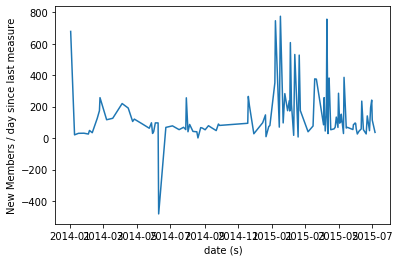

In [97]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('date (s)')
ax1.set_ylabel('New Members / day since last measure')
ax1.plot(forumDF['date'], forumDF['new_members'])
ax1.tick_params(axis='y')

plt.show()

In [91]:
old_val = 0
old_date = forumDF['date'][0]

for i in range(len(new_posts)):
    diff = (forumDF['date'][i] - old_date).days
    if(diff) == 0:
        diff = 1
    new_posts[i] = (forumDF['topics'][i] - old_val)/diff
    old_val = forumDF['topics'][i]
    old_date = forumDF['date'][i]

forumDF['new_topics'] = new_posts

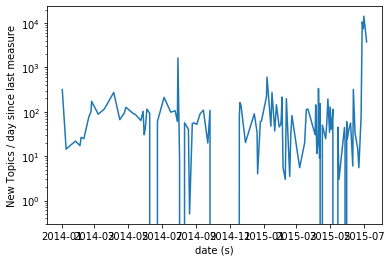

In [99]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('date (s)')
ax1.set_ylabel('New Topics / day since last measure')
ax1.plot(forumDF['date'], forumDF['new_topics'])
ax1.tick_params(axis='y')
plt.yscale('log')

plt.show()

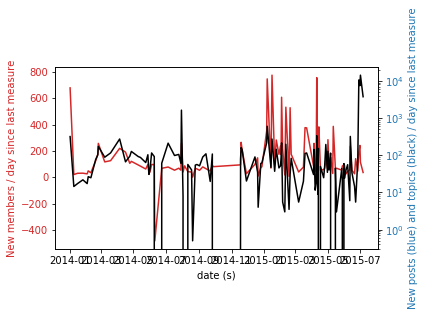

In [100]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date (s)')
ax1.set_ylabel('New members / day since last measure', color=color)
ax1.plot(forumDF['date'], forumDF['new_members'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New posts (blue) and topics (black) / day since last measure', color=color)  # we already handled the x-label with ax1
ax2.plot(forumDF['date'], forumDF['new_posts'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(forumDF['date'], forumDF['new_topics'], color='black')
ax2.tick_params(axis='y', labelcolor=color)
plt.yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

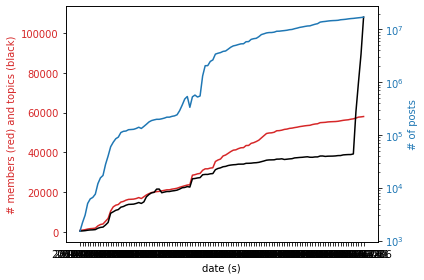

In [43]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date (s)')
ax1.set_ylabel('# members (red) and topics (black)', color=color)
ax1.plot(forumDF['date'], forumDF['members'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(forumDF['date'], forumDF['topics'], color='black')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of posts', color=color)  # we already handled the x-label with ax1
ax2.plot(forumDF['date'], forumDF['posts'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

